In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [2]:
#Reading the Data
data = pd.read_csv("E:\Python All in One\DATA_SETS\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\K_Nearest_Neighbors\Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Separate the dependent and independent variables
x = data.iloc[:, 2:4].values
y = data.iloc[:,4].values

In [5]:
#Separating the Training set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
#Building our model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [7]:
#Predicting our variables
y_pred = classifier.predict(x_test)

In [8]:
#Evaluating our model
score = classifier.score(x_test, y_test)*100
print(score)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

91.0
[[62  6]
 [ 3 29]]


In [9]:
'''Adjusted R-Squared Value = {
(r^2(n+1)-p)/(n-p-1) }'''

adj_rsq = ((score*len(x_test)+1)-2)/(len(x_test)-2-1)
adj_rsq

93.80412371134021

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


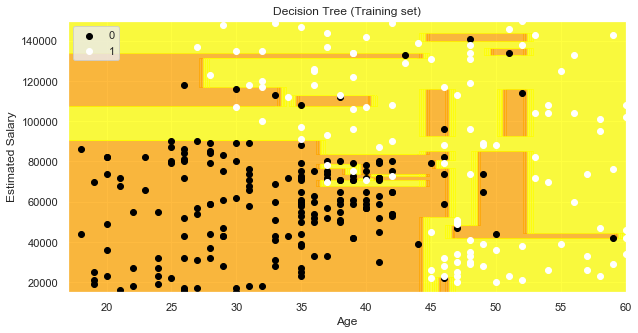

In [11]:
#Visualizing our Training Set

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1),
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'yellow')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Decision Tree (Training set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


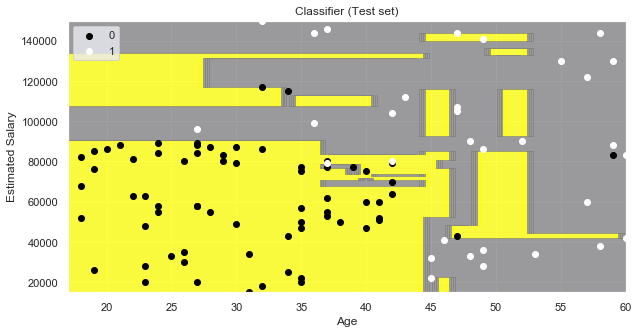

In [12]:
#Visualizing our Test Set
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1), 
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'Grey')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Classifier (Test set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()

In [13]:
cm = confusion_matrix(y_train, classifier.predict(x_train))
cm

array([[189,   0],
       [  0, 111]], dtype=int64)